# TIME AND FREQUENCY CHARACTERIZATION OF SIGNALS AND SYSTEMS

In analyzing LTI systems, it is often particularly convenient to utilize the frequency domain because differential and difference equations and convolution operations in the time domain become algebraic operations in the frequency domain. This document will go through various methods of visualizing the frequency domain. This document will also guide you through some scripts written in python to demonstrate some concepts and examples introduced in chapter 6 of ''SIGNALS & SYSTEM'' by _ALAN V. OPPENHEIM ALAN S. WILLSKY_

In [77]:
# First and foremost, we shall import the very important libraries used throughout for visualiztion and processing:

import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting and visualizations
from scipy import signal        # For signal processing

## Magnitude-Phase representation of Fourier Transform

Alright, let's break it down. The magnitude-phase representation of the Fourier transform is one of the way of expressing how a signal changes over different frequencies. Imagine you have a signal, like a sound or an electrical signal. The Fourier transform breaks down this signal into its individual frequency components. 

Now, the magnitude part of the representation tells you how much of each frequency component is present in the signal. It's like asking, "How loud is each frequency?" This helps us understand which frequencies are strong or weak in the signal.

On the other hand, the phase part of the representation tells you the timing relationship between the different frequency components. It's like asking, "When does each frequency occur relative to the others?" This helps us understand how the different parts of the signal are synchronized or aligned.

So, when we talk about the magnitude-phase representation of the Fourier transform, we're essentially talking about a way to understand both the strength and timing of the various frequency components that make up a signal. It's a powerful tool for analyzing and manipulating signals in fields like telecommunications, audio processing, and image processing.


### Example: Magnitude-Phase representation of Fourier Transform

Let's say we had following function:

$$x(t) = 1 + \sin(2\pi t) + .5 \cos(2\pi 3 t) + .2 \sin(2\pi 5 t)$$

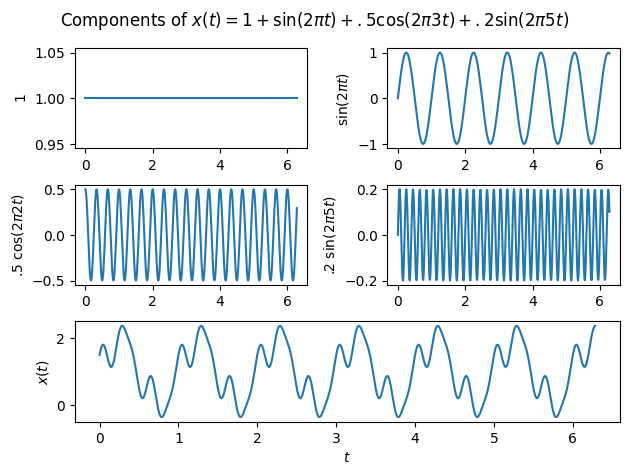

In [78]:
t = np.linspace(0, 2*np.pi, 500)
x = np.ones(len(t)) + np.sin(2 * np.pi * t) + .5 * np.cos(2 * np.pi * 3 * t) + .2 * np.sin(2 * np.pi * 5 * t)

axs1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
axs1.plot(t, np.ones(len(t)))
axs1.set(ylabel = '$1$')

axs2 = plt.subplot2grid((3, 2), (0, 1), colspan=1)
axs2.plot(t, np.sin(2 * np.pi * t))
axs2.set(ylabel = r'$\sin(2\pi t)$')

axs3 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
axs3.plot(t, .5 * np.cos(2 * np.pi * 3 * t))
axs3.set(ylabel = r'.5 $\cos(2\pi 2 t)$')

axs4 = plt.subplot2grid((3, 2), (1, 1), colspan=1)
axs4.plot(t, .2 * np.sin(2 * np.pi * 5 * t))
axs4.set(ylabel = r'.2 $\sin(2\pi 5 t)$')

axs5 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
axs5.plot(t, x)
axs5.set(xlabel = '$t$', ylabel = '$x(t)$')

plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.suptitle("Components of $x(t) = 1 + \sin(2\pi t) + .5 \cos(2\pi 3 t) + .2 \sin(2\pi 5 t)$");

To find the Fourier transform of $x(t) = 1 + \sin(2\pi t) + 0.5 \cos(2\pi 3 t) + 0.2 \sin(2\pi 5 t)$, we can use the definition of the Fourier transform:

$$X(f) = \int_{-\infty}^{\infty} x(t) \cdot e^{-i 2 \pi f t} dt$$

Let's calculate it step by step for each component of $ x(t) $:

1. The Fourier transform of the D.C. component $1$ is simply $\delta(\omega)$.
2. The Fourier transform of $\sin(2\pi t)$ is $\frac{1}{2i}[\delta(\omega-1) - \delta(\omega+1)]$.
3. The Fourier transform of $\cos(2\pi 3 t)$ is $\frac{1}{2}[\delta(\omega-3) + \delta(\omega+3)]$.
4. The Fourier transform of $\sin(2\pi 5 t)$ is $\frac{1}{2i}[\delta(\omega-5) - \delta(\omega+5)]$.

Adding up these components, we get:

$$ X(f) = 1 - 0.5i \cdot [\delta(\omega-1) - \delta(\omega+1)] + 0.5 \cdot 0.5 \cdot [\delta(\omega-3) + \delta(\omega+3)] - 0.2 \cdot 0.5i \cdot [\delta(\omega-5) - \delta(\omega+5)] $$

This expression represents the Fourier transform of $x(t)$.

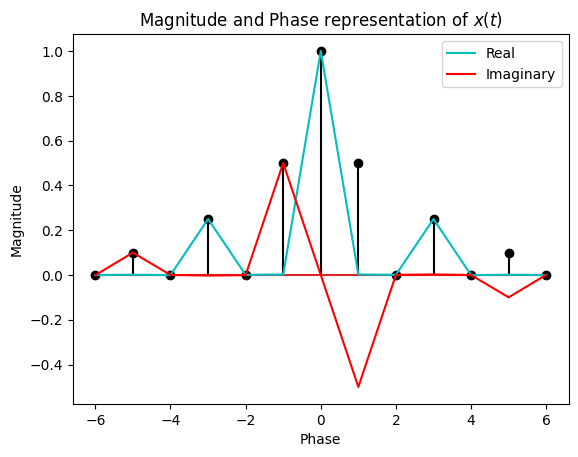

In [79]:
t = np.linspace(0, 1, 1000)
x = np.ones(len(t)) + np.sin(2 * np.pi * t) + .5 * np.cos(2 * np.pi * 3 * t) + .2 * np.sin(2 * np.pi * 5 * t)

X = np.fft.fftshift(np.fft.fft(x)) / 1000
X = X[len(t)//2 - 6: len(t)//2 + 7]

plt.stem(np.arange(-6, 7), abs(X), 'k')
plt.plot(np.arange(-6, 7), X.real, 'c', label = 'Real')
plt.plot(np.arange(-6, 7), X.imag, 'r', label = 'Imaginary')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Magnitude and Phase representation of $x(t)$')
plt.legend();

## MAGNITUDE-PHASE REPRESENTATION OF THE FREQUENCY RESPONSE OF LTI SYSTEMS

When we discuss the magnitude-phase representation of the frequency response of LTI systems, we're essentially exploring how such systems behave across different frequencies. The frequency response of an LTI system tells us how the system responds to different frequencies in the input signal. From the fourier transform property, we know that for a system with output fourier transform $Y(j\omega)$ and input fourier transform $X(j\omega)$, we always have $H(j\omega)$ such that $Y(j\omega) = H(j\omega)\cdot X(j\omega)$. This $H(j\omega)$ is called the frequency response of the system. The magnitude-phase representation of this response breaks it down into two parts:

1. **Magnitude Response**: This part tells us how much the system amplifies or attenuates each frequency component of the input signal. It's like asking, "How much does the system 'like' or 'dislike' each frequency?" This gives us insight into which frequencies the system boosts or dampens. This can be denoted by $|H(j\omega)|$

2. **Phase Response**: This part tells us the timing relationships between the input and output signals at different frequencies. It's like asking, "How does the system shift the timing of each frequency?" This helps us understand if the system delays or advances certain frequencies in the output signal compared to the input. This can be denoted by $\angle H(j\omega)$

**NOTE**: $$|Y(j\omega)| = |H(j\omega)||X(j\omega)|$$ $$\angle Y(j\omega) = \angle H(j\omega) + \angle X(j\omega)$$
By understanding both the magnitude and phase responses of the frequency response of an LTI system, we gain a comprehensive view of how the system behaves across the entire frequency spectrum. This understanding is crucial in various fields like communications, control systems, and signal processing for designing and analyzing systems to meet specific performance criteria.

### Example: Frequency response

Suppose that there is a LTI system with frequency response of $H(j\omega) = e^{-j\omega t_o}$, its mag response $|H(j\omega)| = 1$ and phase response $\angle H(j\omega) = -t_o\omega$

## Log-Magnitude and Bode Plots for me

Of course, let's dive into it with a bit more mathematical detail.

**Log-Magnitude Plots:**
In a log-magnitude plot, we represent the magnitude response of a system on a logarithmic scale. Mathematically, if $x(t)$ represents the frequency response of the system, where $H(j\omega)$ is the frequency in radians per second, the log-magnitude plot is obtained by plotting $\omega$ against $20\log_{10}|H(j\omega)|$.

So, if we have a transfer function $\log_{10}\omega$, where $H(s) = \frac{1}{s+1}$ is the Laplace variable, its log-magnitude plot would be $s = j\omega$ against $20\log_{10}\left|\frac{1}{j\omega+1}\right|$.

**Bode Plots:**
Bode plots provide a graphical representation of the frequency response of a system, displaying both magnitude and phase response. The magnitude response $\log_{10}\omega$ and the phase response $|H(j\omega)|$ are plotted separately against the logarithm of frequency $\angle H(j\omega)$.

For the magnitude response, the Bode plot is typically $\log_{10}\omega$ against $20\log_{10}|H(j\omega)|$, similar to the log-magnitude plot.

For the phase response, the Bode plot is $\log_{10}\omega$ against $\angle H(j\omega)$. Here, $\log_{10}\omega$ represents the phase angle in degrees.

These plots are incredibly useful in system analysis and design because they provide insights into how a system responds to different frequencies. By analyzing Bode plots, engineers can understand stability, gain, and phase margin, as well as the overall frequency behavior of a system.


### Example: Bode plot

We have used `scipy` package to help us with signal processing.

We have used `TransferFunction` provided by `signal` subpackage to create a lti system from its frequency response. From the docs ''Linear Time Invariant system class in transfer function form. It represents the system as the continuous-time transfer function''
$$H(s)=\sum_{i=0}^N b[N-i] s^i / \sum_{j=0}^M a[M-j] s^j \text{,   or the discrete-time transfer function}$$
$$H(z)=\sum_{i=0}^N b[N-i] z^i / \sum_{j=0}^M a[M-j] z^j$$
''where b are elements of the numerator num, a are elements of the denominator den, and N == len(b) - 1, M == len(a) - 1. TransferFunction systems inherit additional functionality from the lti, respectively the dlti classes, depending on which system representation is used.''

tl;dr We have used a function with frequency response of $H(s) = \frac{1}{s+1}$

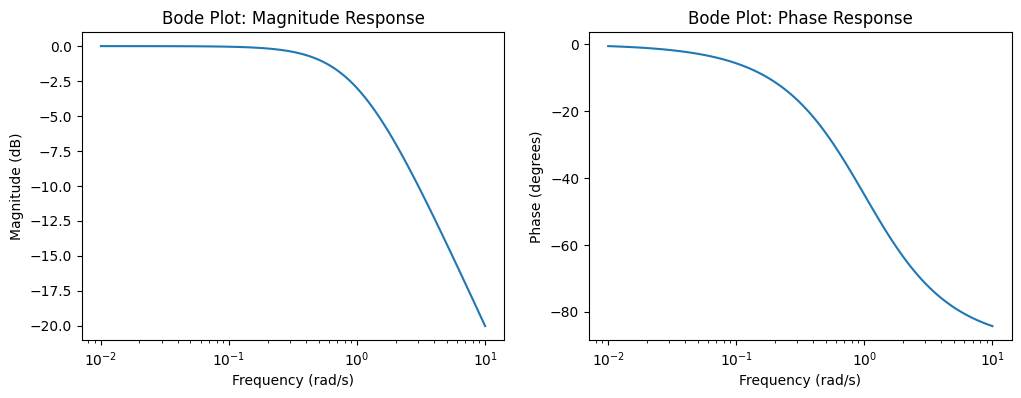

In [80]:
# Calculate magnitude and phase responses using scipy.signal.bode
omega, magnitude, phase= signal.bode(signal.TransferFunction([1], [1, 1]))

plt.figure(figsize=(12, 4))
ax1 = plt.subplot2grid((1,2), (0,0))
ax1.semilogx(omega, magnitude)
ax1.set(title = 'Bode Plot: Magnitude Response')
ax1.set(xlabel = 'Frequency (rad/s)')
ax1.set(ylabel = 'Magnitude (dB)')

ax2 = plt.subplot2grid((1,2), (0,1))
ax2.semilogx(omega, phase)
ax2.set(title = 'Bode Plot: Phase Response')
ax2.set(xlabel = 'Frequency (rad/s)')
ax2.set(ylabel = 'Phase (degrees)');

## Frequency response of various functions:

### Dirac delta function

The frequency response of a system to a Dirac delta function input is an essential concept in signal processing and system analysis. 

A Dirac delta function, denoted as $\delta(t-t_0)$, is a theoretical construct representing an impulse signal that is infinitesimally narrow and infinitely tall, with an area under the curve equal to 1. Mathematically, the Dirac delta function satisfies the following properties:
1. $\int_{-\infty}^{\infty} \delta(t-t_0) \, dt = 1$
2. $\delta(t-t_0) = 0$ for $t \neq t_0$
3. $\delta(t_0) = \infty$

To calculate the frequency response of a system to a Dirac delta function input, we typically use the impulse response of the system. The impulse response $h(t)$ of a system is the system's output when the input is a Dirac delta function $\delta(t)$. 

Once we have the impulse response $h(t)$, we can calculate the frequency response by taking the Fourier transform of the impulse response. The Fourier transform of a signal provides its frequency domain representation.

Mathematically, the frequency response $H(j\omega)$ of a system is given by the Fourier transform of its impulse response $h(t)$:
$$H(j\omega) = \int_{-\infty}^{\infty} h(t-t_0) \cdot e^{-j\omega t} \, dt$$
$$H(j\omega) = e^{-j\pi t_0}$$

Where:
- $\omega$ represents angular frequency in radians per second.
- $j$ is the imaginary unit ( $j^2 = -1$ ).
- $h(t)$ is the impulse response of the system.

The result makes sense, as when we apply $y(t) = h(t-t_0) * x(t)$, we observe shift in phases of all frequencies in frequency domain, and by the properties of fourier transforms, we have $Y(j\omega) = e^{-j\omega t_0}X(j\omega)$, which means $h(t-t_0)$ the same.

### SINC function

The sinc function, denoted as $\text{sinc}(t)$, is a fundamental function in signal processing and mathematics. It is defined as:

$$\text{sinc}(t) = \frac{\sin(\pi t)}{\pi t}$$

The sinc function has several important properties:
1. It is an even function: $\text{sinc}(-t) = \text{sinc}(t)$.
2. It has zeros at integer multiples of $\pi$: $\text{sinc}(n\pi) = 0$ for all integers $n \neq 0$.
3. Its maximum value is 1: $\text{sinc}(0) = 1$.
4. It decays as $\frac{1}{t}$ as $|t|$ increases.

The sinc function is often encountered in signal processing because it arises naturally in the context of sampling theory, Fourier transforms, and filter design.

To calculate the frequency response of a system to a sinc function input, similar to the Dirac delta function case, we would use the impulse response of the system. If the system is linear and time-invariant (LTI), its response to the sinc function input can be obtained by convolving the sinc function with the system's impulse response.

Mathematically, the frequency response $H(j\omega)$ of the system would be the Fourier transform of the impulse response $h(t)$, just as in the case of the Dirac delta function.

$$H(j\omega) = \int_{-\infty}^{\infty} h(t) \cdot e^{-j\omega t} \, dt$$
$$H(j\omega) = \text{rect}(t)$$

Understanding the frequency response of a system to a sinc function input is important in various applications, such as digital signal processing, where the sinc function often arises in the context of interpolation, reconstruction, and anti-aliasing filtering.

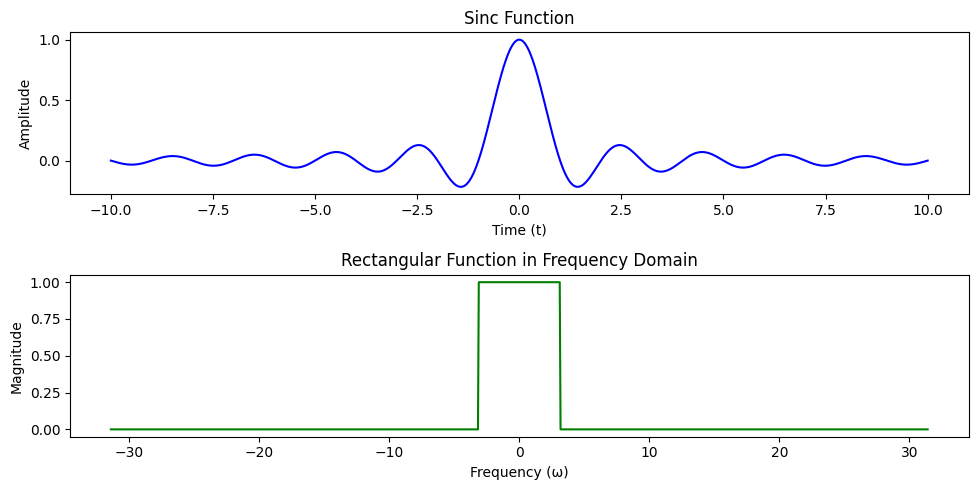

In [81]:
t = np.linspace(-10, 10, 1000)
sinc_t = np.sinc(t)  # Sinc function

# Frequency domain
omega = np.linspace(-10*np.pi, 10*np.pi, 1000)
rect_omega = np.where(np.abs(omega) <= np.pi, 1, 0)

# Plot sinc function in time domain
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, sinc_t, label='Sinc(t)', color='blue')
plt.title('Sinc Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')

# Plot rectangular function in time domain
plt.subplot(2, 1, 2)
plt.plot(omega, rect_omega, label='Rect(ω)', color='green')
plt.title('Rectangular Function in Frequency Domain')
plt.xlabel('Frequency (ω)')
plt.ylabel('Magnitude')
plt.tight_layout();

## Time-domain properties of ideal frequency-selective filters

Ideal frequency-selective filters, such as low-pass, high-pass, band-pass, and band-stop filters, exhibit distinct time-domain properties based on their frequency response characteristics. Here are some key time-domain properties of ideal frequency-selective filters:

1. **Impulse Response**: 
   - The impulse response of an ideal frequency-selective filter corresponds to the inverse Fourier transform of its frequency response.
   - For example, the impulse response of an ideal low-pass filter is a sinc function, while the impulse response of an ideal high-pass filter is the negative of a sinc function.

2. **Time Delay**: 
   - Frequency-selective filters introduce time delays in the signal propagation.
   - The time delay is related to the group delay of the filter, which is the derivative of the phase response with respect to frequency.
   - Low-pass filters typically exhibit minimal time delay for low-frequency components but introduce significant delay for high-frequency components.

3. **Finite Duration**: 
   - Ideal frequency-selective filters have infinite impulse responses, which means they extend indefinitely in time.
   - In practice, physical filters are implemented with finite impulse responses, resulting in finite-duration responses.

4. **Ringing and Overshoot**: 
   - Ideal frequency-selective filters may exhibit ringing and overshoot in their time-domain response, especially in the transition band between passband and stopband.
   - Ringing refers to the oscillatory behavior of the filter's output after an abrupt input change, and overshoot refers to the temporary increase in amplitude beyond the steady-state value.

5. **Step Response**: 
   - The step response of a frequency-selective filter corresponds to the integral of its impulse response.
   - It represents the filter's output when the input signal abruptly transitions from zero to a constant value.
   - The step response provides insights into the filter's settling time, overshoot, and stability.

6. **Time-Domain Distortion**: 
   - Frequency-selective filters can introduce distortion in the time domain, altering the shape and duration of input signals.
   - Distortion effects include phase distortion, amplitude distortion, and transient distortion, which can degrade signal quality and fidelity.

Understanding these time-domain properties is essential for analyzing the behavior of frequency-selective filters in practical applications, such as audio processing, telecommunications, and signal transmission. Engineers use time-domain analysis to evaluate filter performance, optimize design parameters, and mitigate undesirable effects like ringing and distortion.

![Filters](ch6_files/filters.jpg)

## Time-domain and frequency-domain aspects of nonideal filters

Nonideal filters deviate from the ideal characteristics due to practical limitations in their implementation, such as finite impulse response (FIR) or infinite impulse response (IIR) nature, passband ripple, stopband attenuation, transition bandwidth, and phase distortion. Here's how their time-domain and frequency-domain aspects differ from ideal filters:

**Time-Domain Aspects:**

1. **Finite Duration:**
   - Unlike ideal filters, nonideal filters often have finite impulse responses (FIR) or finite step responses due to practical limitations in their design.
   - FIR filters have a finite length, resulting in a bounded duration of their impulse response.
   - IIR filters, while theoretically having infinite duration, are often designed with a finite number of poles and zeros, resulting in a finite duration in practice.

2. **Transient Response:**
   - Nonideal filters exhibit transient response phenomena, such as overshoot, ringing, and settling time, especially during the transition between passband and stopband.
   - The transient response is influenced by factors such as filter order, pole locations, and passband ripple.

3. **Group Delay:**
   - Group delay characterizes the phase delay experienced by different frequency components of the input signal as they pass through the filter.
   - Nonideal filters may introduce varying group delay across the frequency spectrum, leading to phase distortion and signal smearing.

**Frequency-Domain Aspects:**

1. **Frequency Response:**
   - Nonideal filters deviate from the ideal frequency response due to passband ripple, stopband attenuation, and transition bandwidth limitations.
   - Passband ripple refers to the variation in magnitude response within the passband, while stopband attenuation denotes the degree of attenuation in the stopband.
   - Transition bandwidth defines the frequency range over which the filter transitions between passband and stopband regions.

2. **Phase Distortion:**
   - Nonideal filters may introduce phase distortion, where the phase response varies with frequency.
   - Phase distortion alters the timing relationships between different frequency components of the input signal, affecting signal fidelity and coherence.

3. **Frequency Selectivity:**
   - The frequency selectivity of nonideal filters may differ from ideal filters due to imperfections in their design or implementation.
   - Nonideal filters may exhibit narrower or broader frequency selectivity than desired, impacting their ability to discriminate between desired and undesired frequency components.

Understanding the time-domain and frequency-domain aspects of nonideal filters is crucial for designing and evaluating filter performance in practical applications. Engineers must consider trade-offs between filter complexity, performance specifications, and implementation constraints to achieve desired filtering characteristics while minimizing undesirable effects.

# Analysis of an Automobile Suspension System

![Suspension](ch6_files/suspension.png)

We found this topic in book quite interesting, so we tried to plot some equations here.

We derive a differential equation from the diagram. Using newton's laws of motion:

$$M \ddot{y} + b \dot{y} + k y = k x + b \dot{x}$$

The frequency response of the system:

$$H\left(j\ \omega\right)\ =\ \frac{ \omega _{n}^{2}+2D \omega _{n}\left(j \omega \right)}{\left(j \omega \right)^{2}+2D \omega _{n}\left(j \omega \right)+ \omega _{n}^{2}}$$

Where $\omega_n = \sqrt{k/M}$ is referred to as the undamped natural frequency, $2D \omega_n = b/M$ and $D$ as the damping ratio. We have written a code to visualise this response. As you can see, the system always respond in a frequency with phase shift of $\pi/2$ which means that the system always respond with damping force against the force applied.

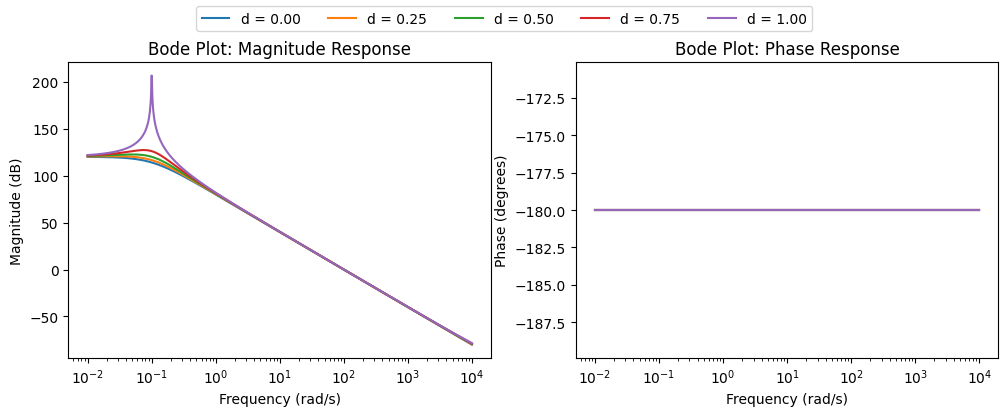

In [82]:
def getTransferFunction(d, wn):
    return signal.TransferFunction(
        [wn**2, 2j*d*wn, 0],
        [-1, 2j*d*wn, wn**2]
    )

plt.figure(figsize=(12, 4))
ax1 = plt.subplot2grid((1,2), (0,0))
ax2 = plt.subplot2grid((1,2), (0,1))

for d in np.linspace(0, 1, 5):
    omega, magnitude, phase = signal.bode(getTransferFunction(d, wn), n = 1000)
    ax1.semilogx(omega[::-1], magnitude, label = f'd = {d:.2f}')
    ax1.set(title = 'Bode Plot: Magnitude Response')
    ax1.set(xlabel = 'Frequency (rad/s)')
    ax1.set(ylabel = 'Magnitude (dB)')

    ax2.semilogx(omega[::-1], phase, label = f'd = {d:.2f}')
    ax2.set(title = 'Bode Plot: Phase Response')
    ax2.set(xlabel = 'Frequency (rad/s)')
    ax2.set(ylabel = 'Phase (degrees)')

# Put a legend below current axis
plt.suptitle('')
plt.subplots_adjust(top=.85)
plt.figlegend(*ax2.get_legend_handles_labels(), loc = 'upper center', ncol=5, labelspacing=0.3);